In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### College Scorecard from US Department of Education Dataset

In [2]:
df = pd.read_csv('datasets/college_datav3.csv')
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


## FacetGrid Categorical Example

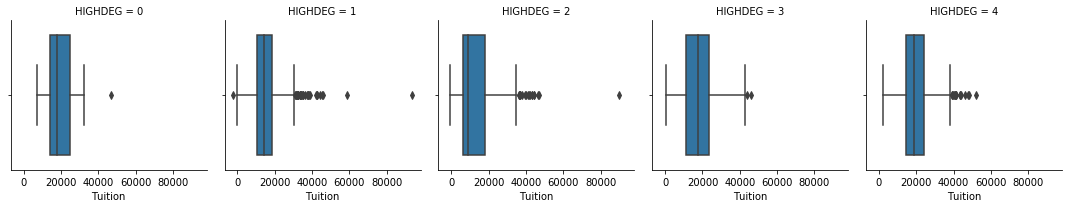

In [3]:
g = sns.FacetGrid(df, col='HIGHDEG')
g.map(sns.boxplot, 'Tuition', order=['1','2','3','4']);

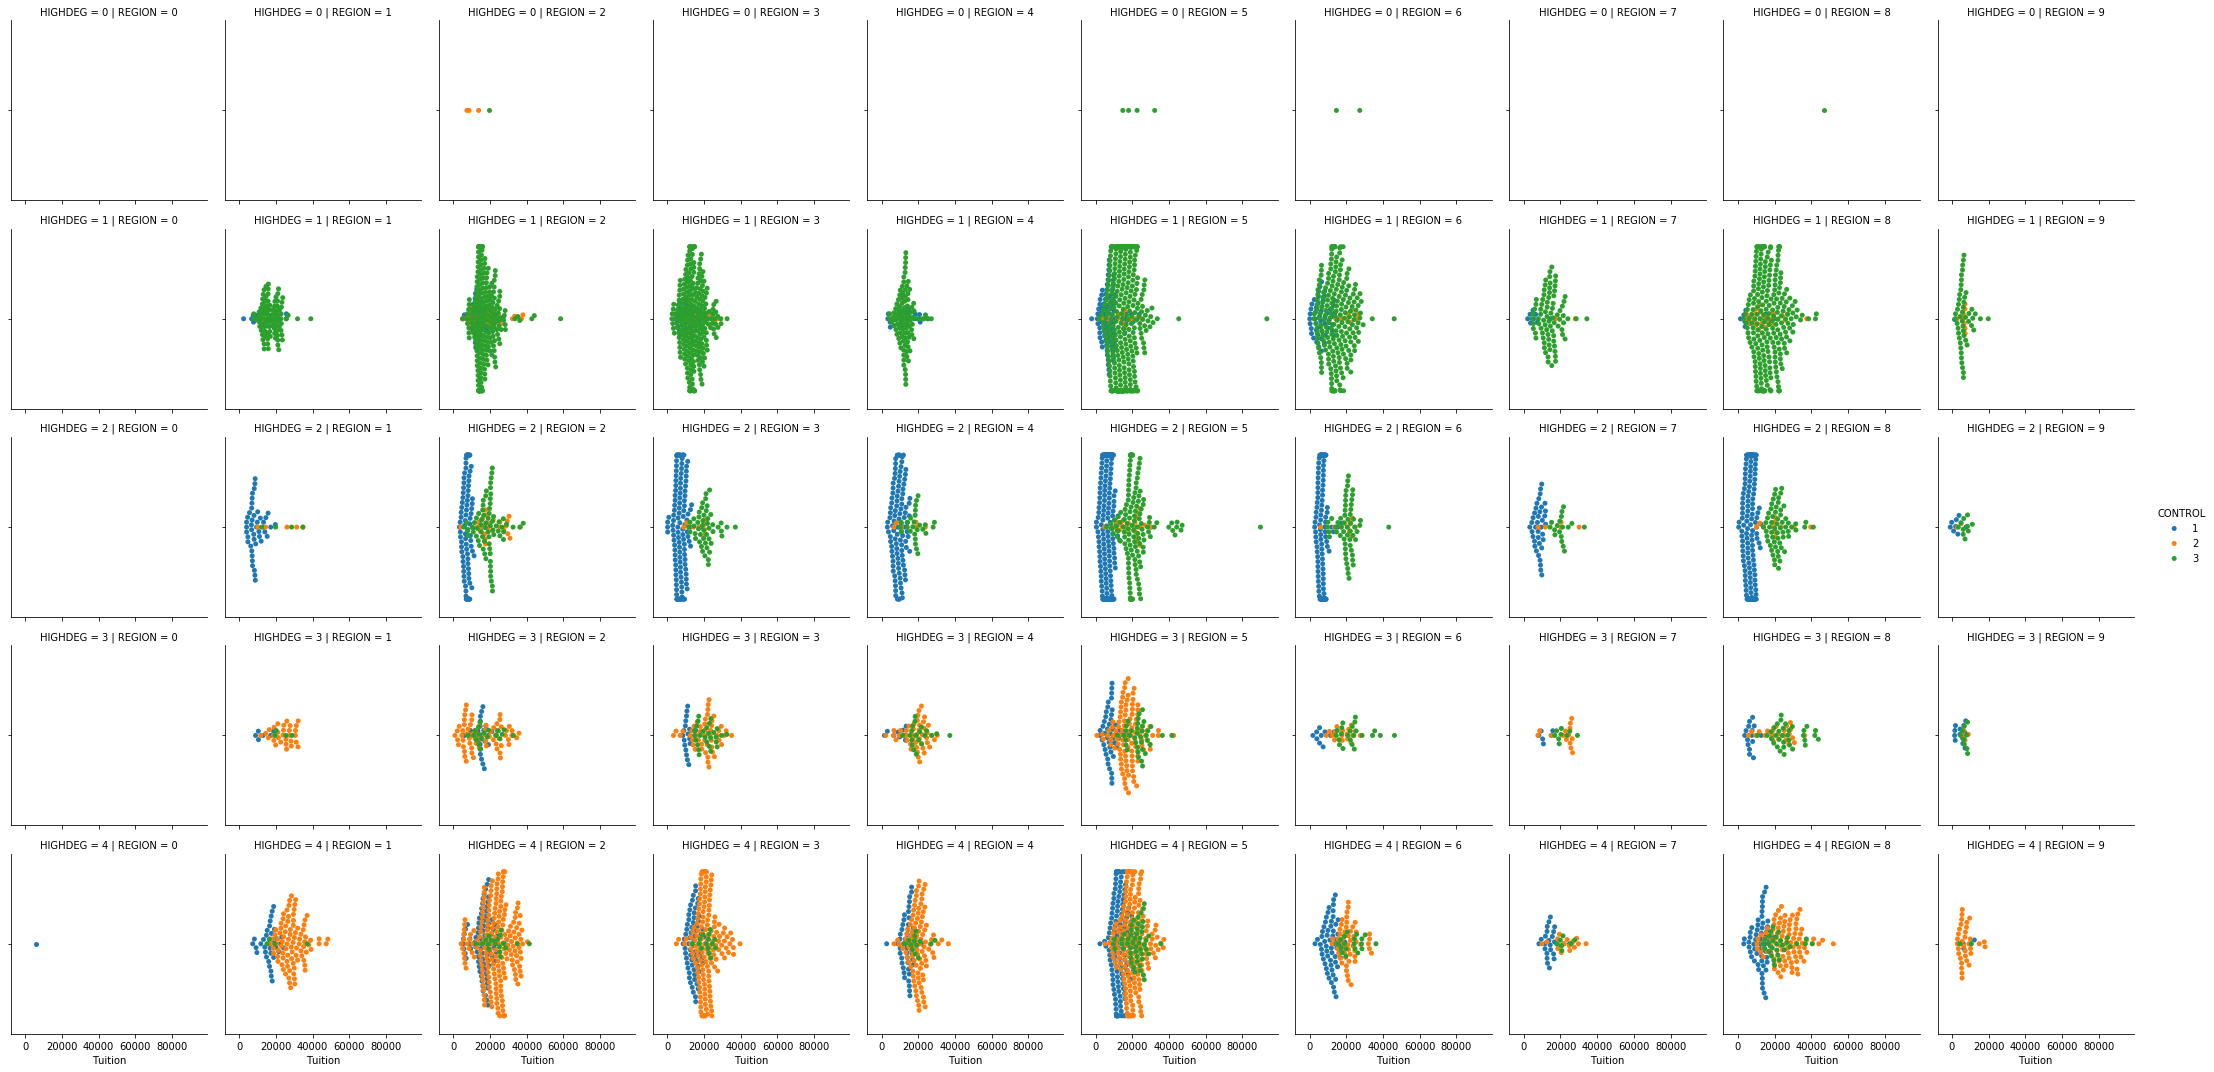

In [16]:
g = sns.FacetGrid(df, col='REGION', row='HIGHDEG', hue='CONTROL')
g.map(sns.swarmplot, 'Tuition', order=['1','2','3']).add_legend();

In [21]:
df.query('REGION==0')

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
2428,United States Merchant Marine Academy,289200,0,1220.0,0.0671,0.0714,0.217208,885.0,9849.0,PrivacySuppressed,...,1,0.0,0.0,21.0,6125.0,Graduate,Public,US Service Schools,Suburb: Large,Suburb


## Catplot (previously as factorplot)

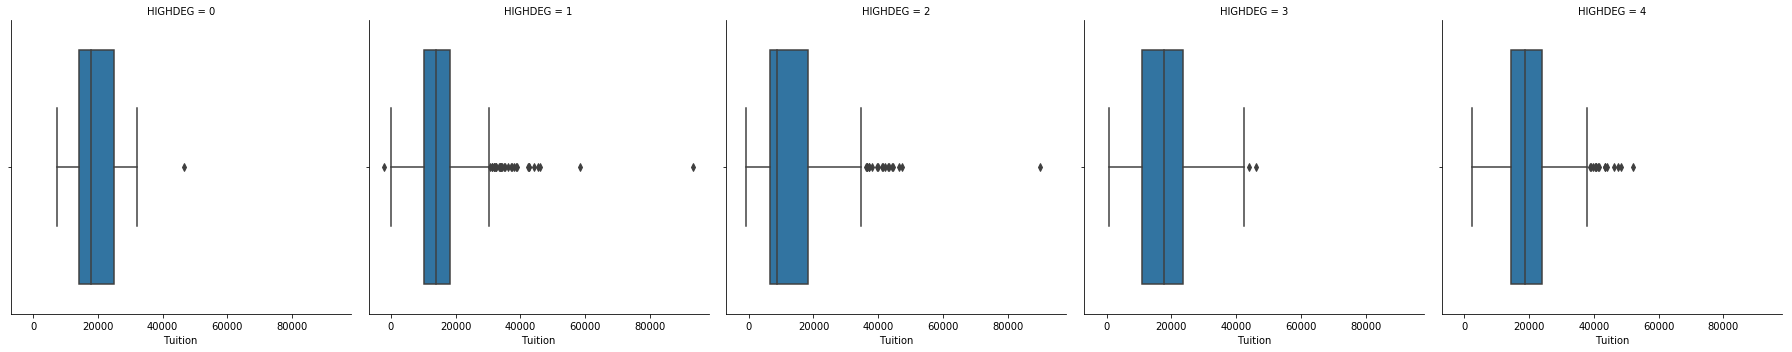

In [23]:
sns.catplot(x='Tuition', data=df, col='HIGHDEG', kind='box');

## lmplot
Provides a shortcut on plotting scatter plots on FacetGrid

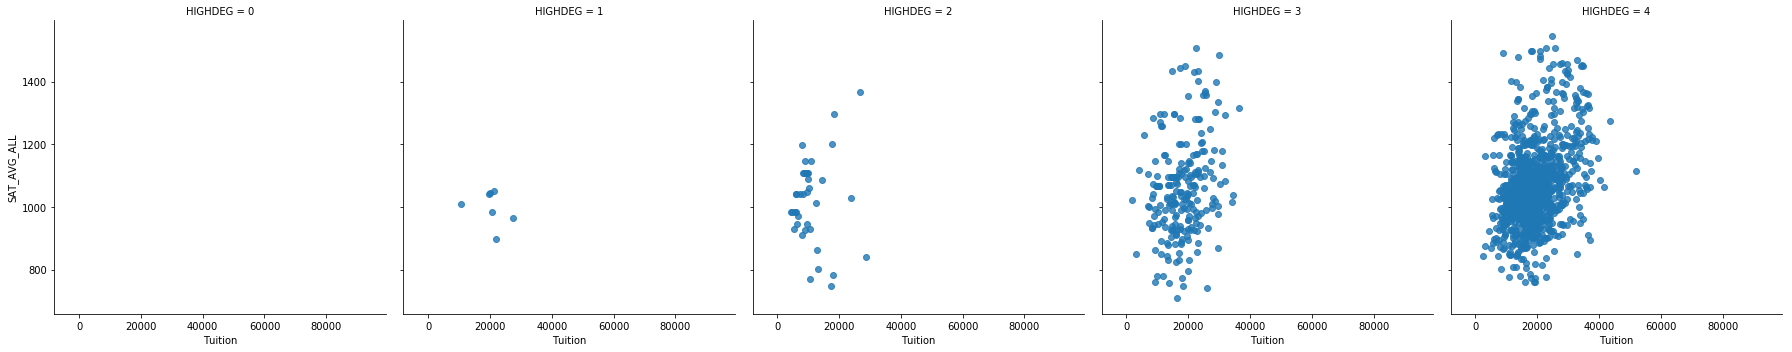

In [26]:
sns.lmplot(data=df, x='Tuition', y='SAT_AVG_ALL',
          col='HIGHDEG', fit_reg=False);

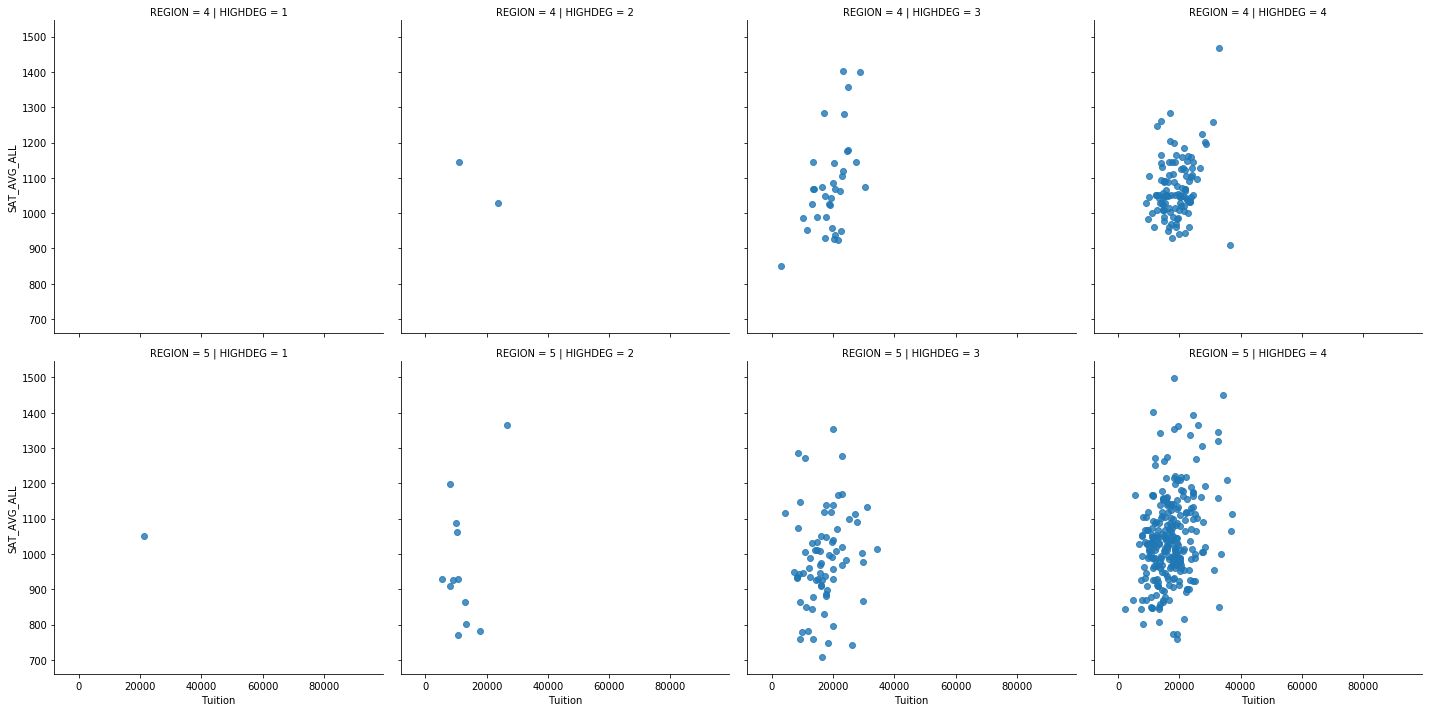

In [35]:
df_filtered = df.query('HIGHDEG > 0 and REGION in (4,5)')

sns.lmplot(data=df_filtered, x='Tuition', y='SAT_AVG_ALL',
          col='HIGHDEG', row='REGION', fit_reg=False);

# Exercise
### Building a FacetGrid

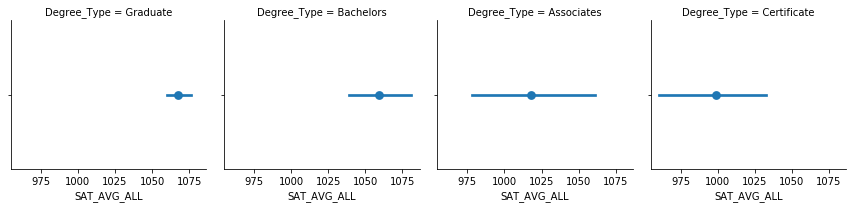

In [48]:
# pointplot
g2 = sns.FacetGrid(df, col='Degree_Type', col_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])
g2.map(sns.pointplot, 'SAT_AVG_ALL', order=[]);

### Using catplot()

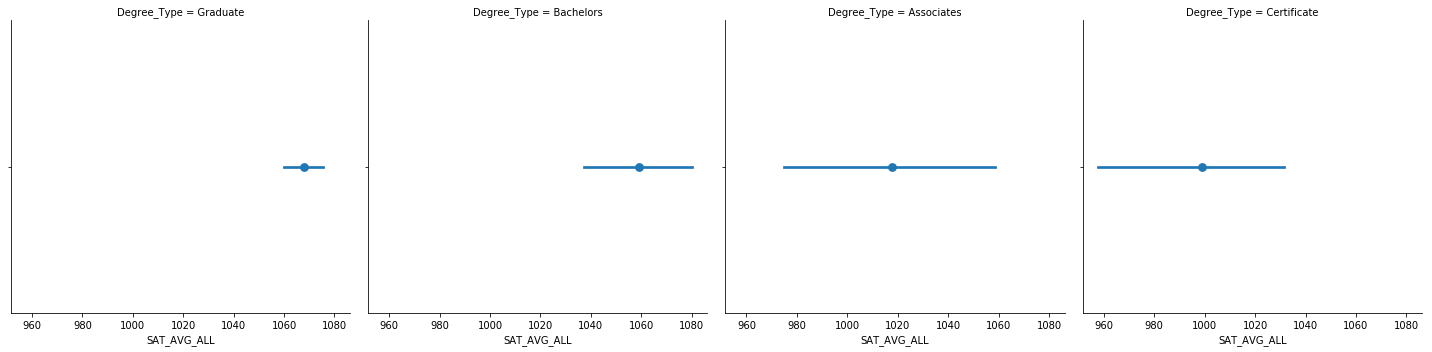

In [50]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.catplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        col='Degree_Type',
        col_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

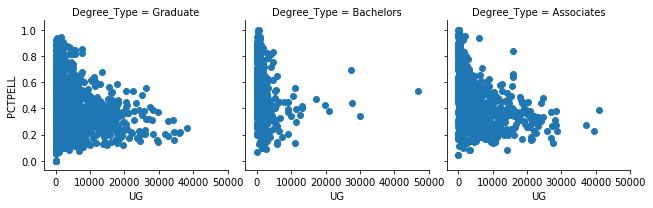

In [51]:
degree_ord = ['Graduate', 'Bachelors', 'Associates']
# Create a FacetGrid varying by column and using the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL');

## lmplot with facetting feature

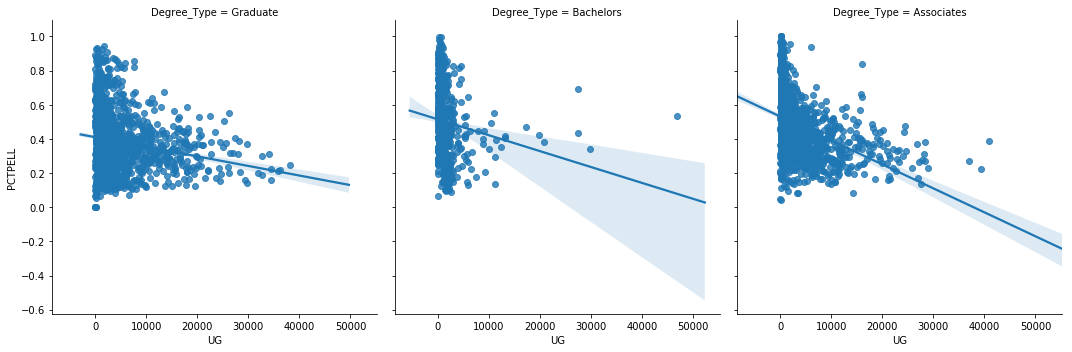

In [52]:
# Re-create the plot above as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord);

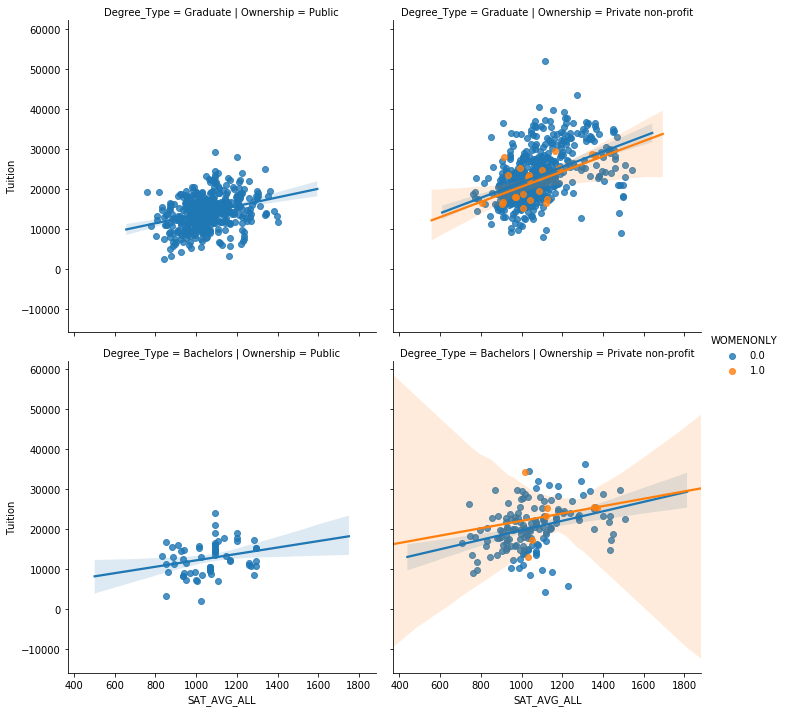

In [53]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=['Public', 'Private non-profit']);